**1. Install Dependencies**

In [1]:
%pip install --upgrade pip
%pip install --disable-pip-version-check \
    torch \
    torchdata --quiet

# If you are using PyTorch backendpy
%pip install torch
%pip install transformers
#lightning @ git+https://github.com/Lightning-AI/lightning@master
%pip install tokenizers
%pip install peft
%pip install jsonargparse[signatures]  # CLI
%pip install bitsandbytes
%pip install accelerate
%pip install datasets
%pip install zstandard
%pip install scipy
%pip install loralib
%pip install einops
%pip install evaluate
%pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.4 MB/s eta 0:00:0000:010:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 54.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.7/401.7 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.1/775.1 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 65.3 MB/s eta 0:00:00a 0:00:01
N

**2. Import Library**

In [2]:
from datasets import load_dataset, Dataset
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig, TrainingArguments, Trainer, DataCollatorForLanguageModeling
import torch
import time
import evaluate
import pandas as pd
import numpy as np
import os
import openpyxl
os.environ['CUDA_VISIBLE_DEVICES'] ='0'

In [3]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

**3. Load Model**

In [4]:
model_name= "tiiuae/falcon-7b-instruct"

original_model = AutoModelForCausalLM.from_pretrained(model_name).to("cuda")

tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

**4. Load Dataset**


In [6]:
error_data_df_train = pd.read_excel('./Error.xlsx')
error_data_df = pd.DataFrame(error_data_df_train)

# duplicate_rows = error_data_df[error_data_df.duplicated()]

# for i in range(5):
#   error_data_df = pd.concat([error_data_df, error_data_df], ignore_index=True)

error_data_df.head()

,Language,Error_Type,Console_Error_Message,Explanation
0,Java,Assignment,java.lang.NullPointerException: Attempt to inv...,This error occurs because you are trying to ca...
1,Java,Assignment,"Exception in thread ""main"" java.lang.NullPoint...",This error happens because the `printLength` m...
2,Java,Assignment,Error: Could not find or load main class Class...,JVM can not find main class to execute.
3,Java,Data Type,Exception in thread “main” java.lang.ClassCast...,Casting to different data type like String or...
4,Java,Array,"Exception in thread ""main"" java.lang.ArrayInde...",If index value is called out of the range caus...


In [7]:
%pip install matplotlib
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 3.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 30.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 4.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 27.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 2.1 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_387/614070687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Language', palette='viridis', data=error_data_df)


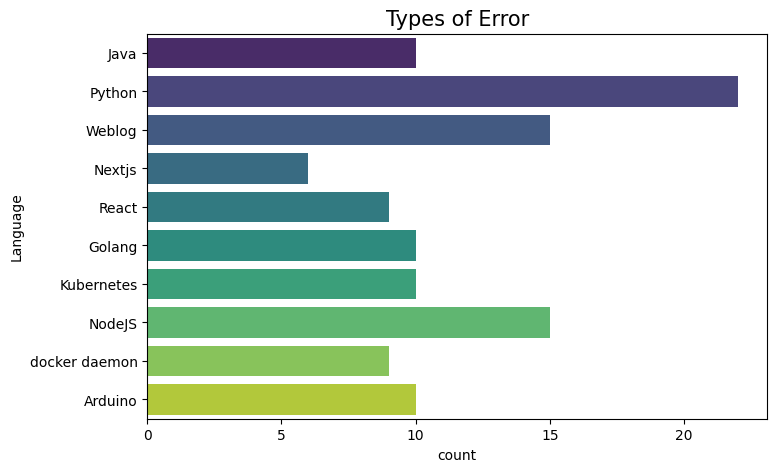

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Language', palette='viridis', data=error_data_df)
plt.title('Types of Error', size=15)
plt.show()

<Axes: >

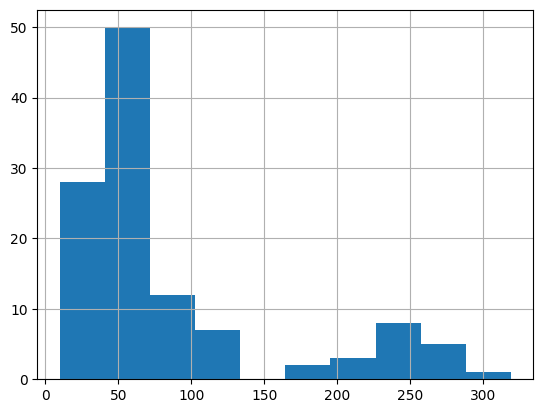

In [9]:
error_data_df['char_length']=error_data_df['Console_Error_Message'].apply(len)
error_data_df['char_length'].hist()

<Axes: >

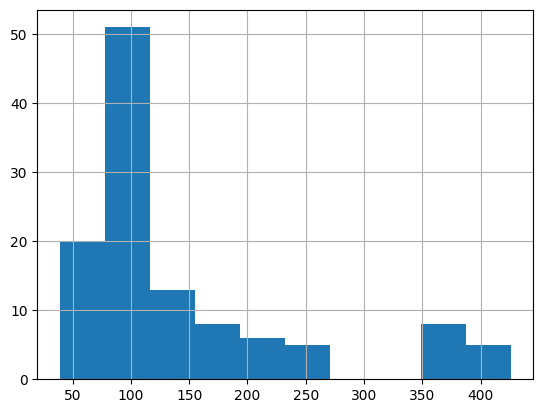

In [10]:
error_data_df['char_length_2']=error_data_df['Explanation'].apply(len)
error_data_df['char_length_2'].hist()

**5. Dataset Prompt Example**

In [12]:
example_data_1 = error_data_df.iloc[100]
example_1_error_message = example_data_1["Console_Error_Message"]
example_1_explanation = example_data_1["Explanation"]

print(f"error: \n{example_1_error_message}\n---------------")
print(f"Explanation: \n{example_1_explanation}\n---------------")

error: 
error getting events from daemon: net/http: request canceled
---------------
Explanation: 
Docker API client closed connection prematurely when processing a request. Add error handling logic in API client.
---------------


**6. Prepare dataset for training**

In [13]:
def gen_prompt(text_input):
    return f"""
    <question>: {text_input["Console_Error_Message"]}
    <answer>: {text_input["Explanation"]}
    """.strip()

def gen_and_tok_prompt(text_input):
    full_input = gen_prompt(text_input)
    tok_full_prompt = tokenizer(full_input, padding = True , truncation =True)
    return tok_full_prompt


dataset = Dataset.from_pandas(error_data_df)

In [14]:
tokenizer.pad_token = tokenizer.eos_token
tokenized_datasets = dataset.map(gen_and_tok_prompt)

Map:   0%|          | 0/116 [00:00<?, ? examples/s]

In [15]:
tokenized_datasets

Dataset({
    features: ['Language', 'Error_Type', 'Console_Error_Message', 'Explanation', 'char_length', 'char_length_2', 'input_ids', 'attention_mask'],
    num_rows: 116
})

**7. New Adapter Layer Initialization**

In [16]:
from peft import LoraConfig, get_peft_model, TaskType

lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["query_key_value"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

**8. Trainer Helper**

In [17]:
def print_number_of_trainable_model_parameters(model):
    trainable_model_params = 0
    all_model_params = 0
    for _, param in model.named_parameters():
        all_model_params += param.numel()
        if param.requires_grad:
            trainable_model_params += param.numel()
    return f"trainable model parameters: {trainable_model_params}\nall model parameters: {all_model_params}\npercentage of trainable model parameters: {100 * trainable_model_params / all_model_params:.2f}%"



**9. Trainer Setup**

In [18]:
from peft import prepare_model_for_kbit_training

original_model.gradient_checkpointing_enable()
original_model = prepare_model_for_kbit_training(original_model)

In [20]:
peft_model = get_peft_model(original_model,
                            lora_config)
print(print_number_of_trainable_model_parameters(peft_model))

output_dir = f'./peft-log-explanation-training-{str(int(time.time()))}'

peft_training_args = TrainingArguments(
    gradient_accumulation_steps=4,
    num_train_epochs=100,
    learning_rate=1e-4,
    fp16=True,
    save_total_limit=4,
    logging_steps=50,
    output_dir=output_dir, # give the location where you want to store checkpoints 
    save_strategy='epoch',
    optim="paged_adamw_8bit",
    lr_scheduler_type = 'cosine',
    warmup_ratio = 0.05,
    metric_for_best_model='accuracy'

)

peft_trainer = Trainer(
    model=peft_model,
    train_dataset=tokenized_datasets,
    args=peft_training_args,
    data_collator= DataCollatorForLanguageModeling(tokenizer, mlm=False)
)

Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


trainable model parameters: 4718592
all model parameters: 6926439296
percentage of trainable model parameters: 0.07%


**10. Train**

In [21]:
peft_trainer.train()
peft_model.config.use_cache = False
# use_reentrant= False

peft_model_path="./peft-log-explanation-checkpoint"

peft_trainer.model.save_pretrained(peft_model_path)
tokenizer.save_pretrained(peft_model_path)

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Step,Training Loss
50,2.187700
100,1.192700
150,0.538100
200,0.257500
250,0.180200
300,0.164200


`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...

('./peft-log-explanation-checkpoint/tokenizer_config.json',
 './peft-log-explanation-checkpoint/special_tokens_map.json',
 './peft-log-explanation-checkpoint/tokenizer.json')

In [22]:
 !zip -r peft-log-explanation-checkpoint.zip peft-log-explanation-checkpoint/



/bin/bash: line 1: zip: command not found


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


**11. Add New Layer to Model**

In [27]:
from peft import PeftModel, PeftConfig

config = PeftConfig.from_pretrained('./peft-log-explanation-checkpoint')
peft_model_base = AutoModelForCausalLM.from_pretrained(
    config.base_model_name_or_path,
    trust_remote_code=True,

)

tokenizer = AutoTokenizer.from_pretrained(
    config.base_model_name_or_path)

peft_model = PeftModel.from_pretrained(peft_model_base,'./peft-log-explanation-checkpoint')


configuration_falcon.py:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- configuration_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.




modeling_falcon.py:   0%|          | 0.00/56.9k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- modeling_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [28]:
print(print_number_of_trainable_model_parameters(peft_model))

trainable model parameters: 0
all model parameters: 6926439296
percentage of trainable model parameters: 0.00%


**12. Run prompt**

In [29]:
# create your own prompt  
prompt = f"""
    <question>: ValueError: y contains new labels
    <answer>: 
    """.strip()

# encode the prompt 
encoding = tokenizer(prompt, return_tensors= "pt").to("cuda")

# set teh generation configuration params 
gen_config = peft_model.generation_config
gen_config.max_new_tokens = 200
gen_config.temperature = 0.2
gen_config.top_p = 0.7
gen_config.num_return_sequences = 1
gen_config.pad_token_id = tokenizer.eos_token_id
gen_config.eos_token_id = tokenizer.eos_token_id

# do the inference 
with torch.inference_mode():
    outputs = peft_model.generate(input_ids = encoding.input_ids, attention_mask = encoding.attention_mask,generation_config = gen_config )
print(tokenizer.decode(outputs[0], skip_special_tokens = True ))

/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1636: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cuda, whereas the model is on cpu. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling f

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument index in method wrapper_CUDA__index_select)

In [20]:
import torch
torch.cuda.is_available()

True

In [21]:
import torch
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [22]:
print(dev)

cuda
